In [20]:
import matplotlib.pyplot as plt, json
import seaborn as sns, statistics

In [21]:
# read json
with open('john_timing_results_unet_pi.json') as f:
    unet_results = json.load(f)
with open('john_timing_results_oct_pi.json') as f:
    oct_results = json.load(f)
with open('john_timing_results_med_pi.json') as f:
    med_results = json.load(f)

oct_results = {int(k): v for k, v in oct_results.items()}
unet_results = {int(k): v for k, v in unet_results.items()}
m3d_results = {int(k): v for k, v in med_results.items()}

In [22]:
def sort_dict(d):
    return dict(sorted(d.items()))
def square(img_size):
    return img_size**2 / 1000

In [23]:
oct_results = sort_dict({square(k): statistics.mean(v) for k, v in oct_results.items()})
unet_results = sort_dict({square(k): statistics.mean(v) for k, v in unet_results.items()})
m3d_results = sort_dict({square(k): statistics.mean(v) for k, v in m3d_results.items()})

In [24]:
unet_results

{102.4: 10.088453610738119,
 160.0: 16.19569714864095,
 230.4: 23.193952957789104,
 313.6: 32.427353064219155,
 409.6: 42.15253742535909}

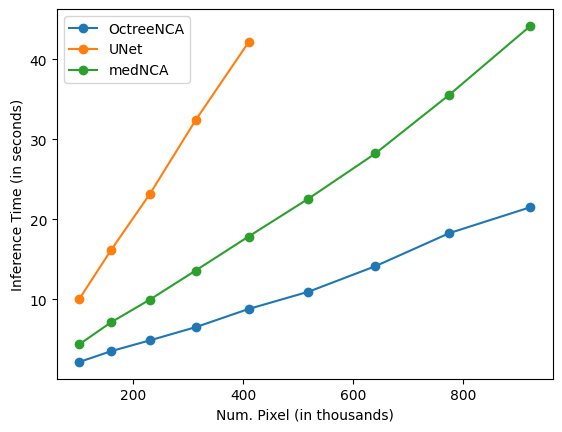

In [25]:
fig, ax = plt.subplots()
plt.plot(oct_results.keys(), oct_results.values(), label='OctreeNCA', marker='o')
plt.plot(unet_results.keys(), unet_results.values(), label='UNet', marker='o')
plt.plot(m3d_results.keys(), m3d_results.values(), label='medNCA', marker='o')
plt.xlabel("Num. Pixel (in thousands)")
plt.ylabel("Inference Time (in seconds)")
ax.ticklabel_format(useOffset=False)
plt.legend()